In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import fitsio
import glob
import pandas as pd

In [44]:
summary_everest = pd.read_csv("summary_entropy_everest.csv")
summary_fuji = pd.read_csv("summary_entropy_fuji.csv")

is_fuji_sv3 = (summary_fuji['SURVEY']=='sv3') & (summary_fuji['PROGRAM']!='backup')
tiles_fuji_sv3 = np.array(list(set(summary_fuji['TILEID'][is_fuji_sv3])))

is_tile_sv3 = np.isin(summary_everest['TILEID'], tiles_fuji_sv3)
summary_everest = summary_everest[is_tile_sv3]

is_tile_sv3 = np.isin(summary_fuji['TILEID'], tiles_fuji_sv3)
summary_fuji = summary_fuji[is_tile_sv3]

In [45]:
summary_everest = summary_everest.sort_values(by=['TILEID'])
summary_fuji = summary_fuji.sort_values(by=['TILEID'])

In [46]:
dd = np.array(summary_everest['TILEID']) - np.array(summary_fuji['TILEID'])
np.count_nonzero(dd!=0), np.count_nonzero(dd==0), len(dd), len(summary_fuji), len(summary_fuji['TILEID'])

(0, 4528, 4528, 4528, 4528)

In [48]:
set(summary_everest['PROGRAM'])

{'bright', 'dark'}

In [35]:
summary_fuji

,TILEID,PROGRAM,SURVEY,PETALID,H,N_GAL,N_STAR,N_QSO,N_GOOD_Z
2112,1,dark,sv3,7,0.990769,208,14,70,292
2114,1,dark,sv3,9,0.985211,261,10,84,355
2113,1,dark,sv3,8,0.995005,248,10,93,351
2110,1,dark,sv3,5,0.995455,238,14,95,347
2109,1,dark,sv3,4,0.988611,228,17,84,329
...,...,...,...,...,...,...,...,...,...
7299,596,backup,sv3,6,0.988458,3,300,0,303
7298,596,backup,sv3,5,0.989699,3,338,0,341
7297,596,backup,sv3,4,0.994020,6,323,1,330
7296,596,backup,sv3,3,0.986656,5,313,0,318


(0.95, 1.0)

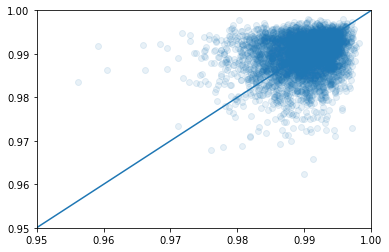

In [49]:
plt.scatter(summary_fuji['H'], summary_everest['H'], alpha=0.1)
x = np.linspace(0.95,1.0, 100)
plt.plot(x,x)
plt.xlim(0.95,1.0)
plt.ylim(0.95,1.0)

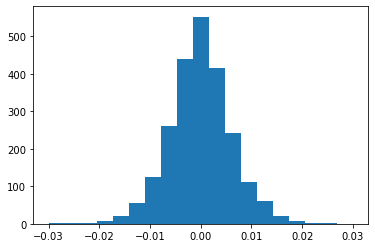

In [54]:
_ = plt.hist(summary_fuji['H'] - summary_everest['H'], bins=np.linspace(-0.03,0.03,20))

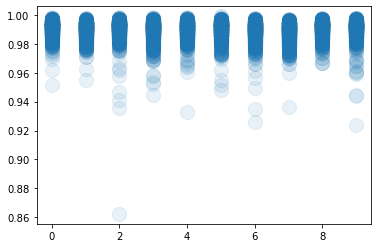

In [8]:
plt.scatter(summary['PETALID'], summary['H'], alpha=0.1, s=200)

(0.88, 1.0)

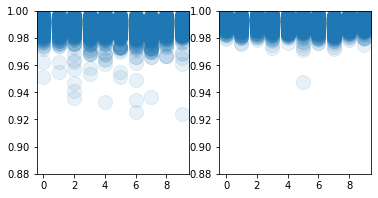

In [4]:
plt.figure(figsize=(6,3))

plt.subplot(1,2,1)
ii=summary['PROGRAM']=='dark'
plt.scatter(summary['PETALID'][ii], summary['H'][ii], alpha=0.1, s=200)
plt.ylim([0.88,1.0])

plt.subplot(1,2,2)
ii=summary['PROGRAM']=='bright'
plt.scatter(summary['PETALID'][ii], summary['H'][ii], alpha=0.1, s=200)
plt.ylim([0.88,1.0])

(0.9, 1.0)

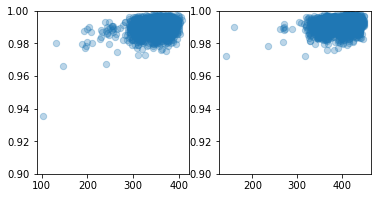

In [7]:
plt.figure(figsize=(6,3))

plt.subplot(1,2,1)
ii=(summary['PROGRAM']=='dark') & (summary['SURVEY']=='main')
plt.scatter(summary['N_GOOD_Z'][ii], summary['H'][ii], alpha=0.3, s=40)
plt.ylim([0.90,1.0])

plt.subplot(1,2,2)
ii=(summary['PROGRAM']=='bright') & (summary['SURVEY']=='main')
plt.scatter(summary['N_GOOD_Z'][ii], summary['H'][ii], alpha=0.3, s=40)
plt.ylim([0.90,1.0])